<a href="https://colab.research.google.com/github/judebebo32/ML_CLG/blob/main/ML_GAN_MODEL_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn openpyxl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
import numpy as np


In [3]:
file_path = "/content/Neworiginal.xlsx"
data = pd.read_excel(file_path, engine='openpyxl')


In [4]:
# Assuming the first 8 columns are input variables and the last 3 columns are output variables
X = data.iloc[:, :8]
y = data.iloc[:, -3:]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
svr = SVR(kernel='linear')


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
import numpy as np


In [8]:
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
svr = MultiOutputRegressor(SVR(kernel='linear'))


In [10]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    return r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test


In [11]:
models = {'GBR': gbr, 'RF': rf, 'SVR': svr}
for name, model in models.items():
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name} model evaluation:")
    print(f"R2 score (train): {r2_train:.3f}")
    print(f"R2 score (test): {r2_test:.3f}")
    print(f"RMSE (train): {rmse_train:.3f}")
    print(f"RMSE (test): {rmse_test:.3f}")
    print(f"MAE (train): {mae_train:.3f}")
    print(f"MAE (test): {mae_test:.3f}")
    print("\n")


GBR model evaluation:
R2 score (train): 1.000
R2 score (test): 0.942
RMSE (train): 0.171
RMSE (test): 2.311
MAE (train): 0.114
MAE (test): 0.975


RF model evaluation:
R2 score (train): 0.989
R2 score (test): 0.923
RMSE (train): 1.007
RMSE (test): 2.703
MAE (train): 0.230
MAE (test): 1.194


SVR model evaluation:
R2 score (train): 0.233
R2 score (test): 0.069
RMSE (train): 8.800
RMSE (test): 9.598
MAE (train): 5.926
MAE (test): 6.143




In [12]:
from sklearn.model_selection import GridSearchCV


In [13]:
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    return best_model


In [14]:
gbr_param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 4, 5]
}

rf_param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

svr_param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 1],
    'estimator__kernel': ['linear', 'poly', 'rbf']
}


In [15]:
models = {'GBR': gbr, 'RF': rf, 'SVR': svr}
param_grids = {'GBR': gbr_param_grid, 'RF': rf_param_grid, 'SVR': svr_param_grid}

for name, model in models.items():
    print(f"Tuning {name} hyperparameters...")
    tuned_model = tune_hyperparameters(model, param_grids[name], X_train, y_train)
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train, y_train, X_test, y_test)
    print(f"{name} model evaluation (tuned):")
    print(f"R2 score (train): {r2_train:.3f}")
    print(f"R2 score (test): {r2_test:.3f}")
    print(f"RMSE (train): {rmse_train:.3f}")
    print(f"RMSE (test): {rmse_test:.3f}")
    print(f"MAE (train): {mae_train:.3f}")
    print(f"MAE (test): {mae_test:.3f}")
    print("\n")


Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned):
R2 score (train): 1.000
R2 score (test): 0.943
RMSE (train): 0.008
RMSE (test): 2.131
MAE (train): 0.005
MAE (test): 0.752


Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned):
R2 score (train): 0.990
R2 score (test): 0.924
RMSE (train): 0.998
RMSE (test): 2.682
MAE (train): 0.229
MAE (test): 1.187


Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned):
R2 score (train): 0.271
R2 score (test): 0.115
RMSE (train): 8.565
RMSE (test): 9.198
MAE (train): 6.075
MAE (test): 6.286




In [16]:
def evaluate_model_per_output(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred, multioutput='raw_values')
    r2_test = r2_score(y_test, y_test_pred, multioutput='raw_values')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred, multioutput='raw_values'))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred, multioutput='raw_values'))
    mae_train = mean_absolute_error(y_train, y_train_pred, multioutput='raw_values')
    mae_test = mean_absolute_error(y_test, y_test_pred, multioutput='raw_values')

    return r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test


In [17]:
for name, model in models.items():
    print(f"Tuning {name} hyperparameters...")
    tuned_model = tune_hyperparameters(model, param_grids[name], X_train, y_train)
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model_per_output(tuned_model, X_train, y_train, X_test, y_test)
    print(f"{name} model evaluation (tuned):")
    for i in range(3):
        print(f"Output {i + 1}:")
        print(f"R2 score (train): {r2_train[i]:.3f}")
        print(f"R2 score (test): {r2_test[i]:.3f}")
        print(f"RMSE (train): {rmse_train[i]:.3f}")
        print(f"RMSE (test): {rmse_test[i]:.3f}")
        print(f"MAE (train): {mae_train[i]:.3f}")
        print(f"MAE (test): {mae_test[i]:.3f}")
        print("\n")


Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned):
Output 1:
R2 score (train): 1.000
R2 score (test): 0.878
RMSE (train): 0.011
RMSE (test): 2.860
MAE (train): 0.008
MAE (test): 1.057


Output 2:
R2 score (train): 1.000
R2 score (test): 0.973
RMSE (train): 0.008
RMSE (test): 1.686
MAE (train): 0.005
MAE (test): 0.585


Output 3:
R2 score (train): 1.000
R2 score (test): 0.978
RMSE (train): 0.004
RMSE (test): 1.613
MAE (train): 0.002
MAE (test): 0.614


Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned):
Output 1:
R2 score (train): 0.994
R2 score (test): 0.931
RMSE (train): 0.741
RMSE (test): 2.149
MAE (train): 0.180
MAE (test): 0.964


Output 2:
R2 score (train): 0.980
R2 score (test): 0.891
RMSE (train): 1.359
RMSE (test): 3.359
MAE (train): 0.286
MAE (test): 1.466


Output 3:
R2 score (train): 0.995
R2 score (test): 0.951
RMSE (train): 0.768
RMSE 

In [20]:
import time



In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



In [25]:
!pip install bayesian-optimization


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from bayes_opt import BayesianOptimization



In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization
import time

# Define the hyperparameter search space for RandomForestRegressor
param_space = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define the search space for Bayesian optimization
bayes_space = {
    'n_estimators': (10, 200),
    'max_depth': (1, 50),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'bootstrap': (0, 1)
}


GRID SEARCH

In [29]:
start_time = time.time()

grid_search = GridSearchCV(rf.estimator, param_grid=param_space, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_grid = grid_search.best_params_

elapsed_time = time.time() - start_time
print(f"Grid Search completed in {elapsed_time:.2f} seconds")
print(f"Best parameters: {best_params_grid}")


Grid Search completed in 185.22 seconds
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


randomized search

In [30]:
start_time = time.time()

random_search = RandomizedSearchCV(rf.estimator, param_distributions=param_space, n_iter=50, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_

elapsed_time = time.time() - start_time
print(f"Randomized Search completed in {elapsed_time:.2f} seconds")
print(f"Best parameters: {best_params_random}")


Randomized Search completed in 38.17 seconds
Best parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}


In [33]:
from sklearn.model_selection import cross_val_score


In [35]:
bayesian_start = time.time()


In [36]:
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap, X_train, y_train):
    model = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        bootstrap=bool(bootstrap),
        random_state=42,
        n_jobs=-1
    )
    return np.mean(cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1))

def optimize_rf(X_train, y_train):
    def rf_crossval(n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap):
        return rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap, X_train, y_train)

    optimizer = BayesianOptimization(
        f=rf_crossval,
        pbounds=bayes_space,
        random_state=42,
    )
    optimizer.maximize(init_points=5, n_iter=25)
    return optimizer.max['params']

start_time = time.time()

best_params_bayesian = optimize_rf(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Bayesian Optimization completed in {time.time() - bayesian_start:.2f} seconds.")



|   iter    |  target   | bootstrap | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.8442    | 0.3745    | 47.59     | 3.196     | 6.789     | 39.64     |
| 2         | 0.6399    | 0.156     | 3.846     | 3.599     | 6.809     | 144.5     |
| 3         | 0.8439    | 0.02058   | 48.53     | 3.497     | 3.699     | 44.55     |
| 4         | 0.8621    | 0.1834    | 15.91     | 2.574     | 5.456     | 65.33     |
| 5         | 0.9026    | 0.6119    | 7.835     | 1.876     | 4.931     | 96.65     |
| 6         | 0.8674    | 1.0       | 46.62     | 1.0       | 10.0      | 94.65     |
| 7         | 0.8639    | 0.06444   | 6.964     | 2.518     | 4.818     | 97.37     |
| 8         | 0.8981    | 1.0       | 11.69     | 1.0       | 5.431     | 93.51     |
| 9         | 0.8923    | 0.9062    | 13.4      | 1.399     | 6.646     | 99.91     |
| 10        | 0.8774    | 1.0       | 5.956     | 1.0 

In [37]:
def evaluate_best_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    return r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test

def print_results(name, model, X_train, y_train, X_test, y_test):
    print(f"{name} model evaluation:")
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_best_model(model, X_train, y_train, X_test, y_test)
    print(f"R2 score (train): {r2_train:.3f}")
    print(f"R2 score (test): {r2_test:.3f}")
    print(f"RMSE (train): {rmse_train:.3f}")
    print(f"RMSE (test): {rmse_test:.3f}")
    print(f"MAE (train): {mae_train:.3f}")
    print(f"MAE (test): {mae_test:.3f}")
    print("\n")

# Train and evaluate the models with the best hyperparameters
best_rf_grid = RandomForestRegressor(**best_params_grid, random_state=42)
best_rf_random = RandomForestRegressor(**best_params_random, random_state=42)
best_rf_bayesian = RandomForestRegressor(
    n_estimators=int(best_params_bayesian['n_estimators']),
    max_depth=int(best_params_bayesian['max_depth']),
    min_samples_split=int(best_params_bayesian['min_samples_split']),
    min_samples_leaf=int(best_params_bayesian['min_samples_leaf']),
    bootstrap=bool(best_params_bayesian['bootstrap']),
    random_state=42,
)

multi_best_rf_grid = MultiOutputRegressor(best_rf_grid)
multi_best_rf_random = MultiOutputRegressor(best_rf_random)
multi_best_rf_bayesian = MultiOutputRegressor(best_rf_bayesian)

multi_best_rf_grid.fit(X_train, y_train)
multi_best_rf_random.fit(X_train, y_train)
multi_best_rf_bayesian.fit(X_train, y_train)

print_results("Grid Search", multi_best_rf_grid, X_train, y_train, X_test, y_test)
print_results("Randomized Search", multi_best_rf_random, X_train, y_train, X_test, y_test)
print_results("Bayesian Optimization", multi_best_rf_bayesian, X_train, y_train, X_test, y_test)


Grid Search model evaluation:
R2 score (train): 1.000
R2 score (test): 0.935
RMSE (train): 0.000
RMSE (test): 2.495
MAE (train): 0.000
MAE (test): 0.839


Randomized Search model evaluation:
R2 score (train): 1.000
R2 score (test): 0.935
RMSE (train): 0.000
RMSE (test): 2.462
MAE (train): 0.000
MAE (test): 0.844


Bayesian Optimization model evaluation:
R2 score (train): 1.000
R2 score (test): 0.931
RMSE (train): 0.000
RMSE (test): 2.538
MAE (train): 0.000
MAE (test): 0.869




In [39]:
def print_r2_scores(name, model, X_train, y_train, X_test, y_test):
    r2_train = r2_score(y_train, model.predict(X_train), multioutput='raw_values')
    r2_test = r2_score(y_test, model.predict(X_test), multioutput='raw_values')
    print(f"{name} model evaluation:")
    print("R2 score (train):", r2_train)
    print("R2 score (test):", r2_test)
    print("\n")

# Before optimization
models_before_optimization = {'GBR': gbr, 'RF': rf, 'SVR': svr}
for name, model in models_before_optimization.items():
    model.fit(X_train, y_train)
    print_r2_scores(name, model, X_train, y_train, X_test, y_test)

# After optimization
optimized_models = {
    'Grid Search': multi_best_rf_grid,
    'Randomized Search': multi_best_rf_random,
    'Bayesian Optimization': multi_best_rf_bayesian
}
for name, model in optimized_models.items():
    print_r2_scores(name, model, X_train, y_train, X_test, y_test)


GBR model evaluation:
R2 score (train): [0.99975954 0.99954967 0.99978978]
R2 score (test): [0.93202441 0.9436518  0.95156811]


RF model evaluation:
R2 score (train): [0.99397008 0.97963407 0.99489512]
R2 score (test): [0.93119001 0.88788859 0.95093832]


SVR model evaluation:
R2 score (train): [0.16526067 0.42474857 0.11012881]
R2 score (test): [ 0.27134323  0.0146302  -0.07849194]


Grid Search model evaluation:
R2 score (train): [1. 1. 1.]
R2 score (test): [0.94681585 0.88157536 0.97546909]


Randomized Search model evaluation:
R2 score (train): [1. 1. 1.]
R2 score (test): [0.93469079 0.89268122 0.97674208]


Bayesian Optimization model evaluation:
R2 score (train): [1. 1. 1.]
R2 score (test): [0.93156574 0.88403641 0.97642866]




In [43]:
# Create initial GBR, RF, and SVR models
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
svr = MultiOutputRegressor(SVR(kernel='linear'))

models = {'GBR': gbr, 'RF': rf, 'SVR': svr}

# Evaluate the initial models
for name, model in models.items():
    r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model_per_output(model, X_train, y_train, X_test, y_test)
    print(f"{name} model evaluation:")
    for i in range(3):
        print(f"Output {i + 1}:")
        print(f"R2 score (train): {r2_train[i]:.3f}")
        print(f"R2 score (test): {r2_test[i]:.3f}")
        print(f"RMSE (train): {rmse_train[i]:.3f}")
        print(f"RMSE (test): {rmse_test[i]:.3f}")
        print(f"MAE (train): {mae_train[i]:.3f}")
        print(f"MAE (test): {mae_test[i]:.3f}")
        print("\n")


GBR model evaluation:
Output 1:
R2 score (train): 1.000
R2 score (test): 0.932
RMSE (train): 0.148
RMSE (test): 2.135
MAE (train): 0.110
MAE (test): 0.879


Output 2:
R2 score (train): 1.000
R2 score (test): 0.944
RMSE (train): 0.205
RMSE (test): 2.414
MAE (train): 0.109
MAE (test): 0.996


Output 3:
R2 score (train): 1.000
R2 score (test): 0.952
RMSE (train): 0.156
RMSE (test): 2.375
MAE (train): 0.122
MAE (test): 1.051


RF model evaluation:
Output 1:
R2 score (train): 0.994
R2 score (test): 0.931
RMSE (train): 0.740
RMSE (test): 2.148
MAE (train): 0.179
MAE (test): 0.962


Output 2:
R2 score (train): 0.980
R2 score (test): 0.888
RMSE (train): 1.380
RMSE (test): 3.405
MAE (train): 0.290
MAE (test): 1.487


Output 3:
R2 score (train): 0.995
R2 score (test): 0.951
RMSE (train): 0.768
RMSE (test): 2.390
MAE (train): 0.221
MAE (test): 1.133


SVR model evaluation:
Output 1:
R2 score (train): 0.165
R2 score (test): 0.271
RMSE (train): 8.702
RMSE (test): 6.990
MAE (train): 6.338
MAE (test)

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
def plot_contour(model, param_grid, X_train, y_train, param1, param2, title):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)

    # Obtain results in a DataFrame
    results = pd.DataFrame(grid.cv_results_)
    
    # Extract values for the two selected parameters
    results[param1] = results['params'].apply(lambda x: x[param1])
    results[param2] = results['params'].apply(lambda x: x[param2])

    # Pivot the results DataFrame to create a matrix of mean_test_score
    scores_matrix = results.pivot_table(index=param1, columns=param2, values='mean_test_score')

    # Create a contour plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(-scores_matrix, annot=True, fmt='.4g', cmap='viridis', cbar_kws={'label': 'Mean Squared Error'})
    plt.title(f'{title} Hyperparameter Contour Plot')
    plt.xlabel(param2)
    plt.ylabel(param1)
    plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits


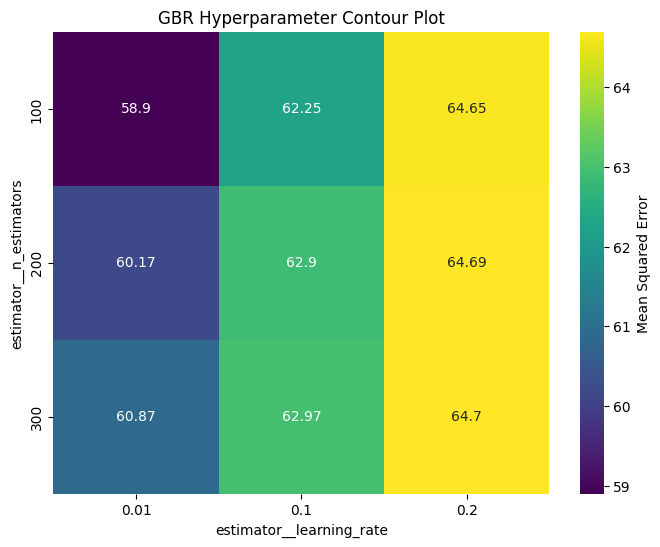

Fitting 5 folds for each of 108 candidates, totalling 540 fits


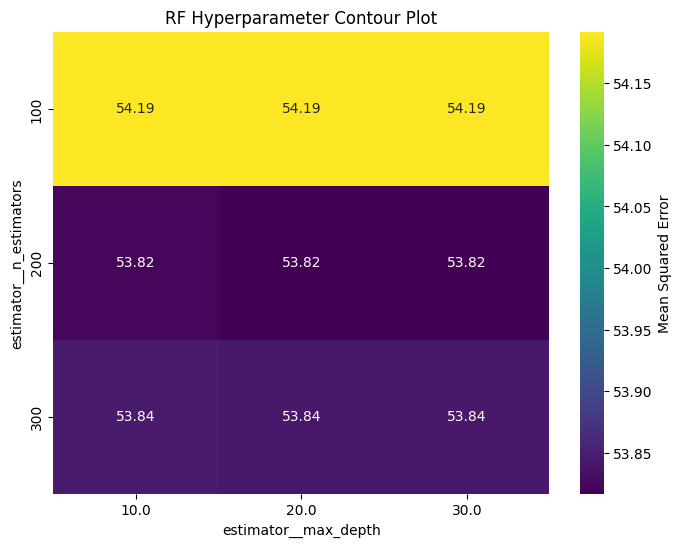

Fitting 5 folds for each of 27 candidates, totalling 135 fits


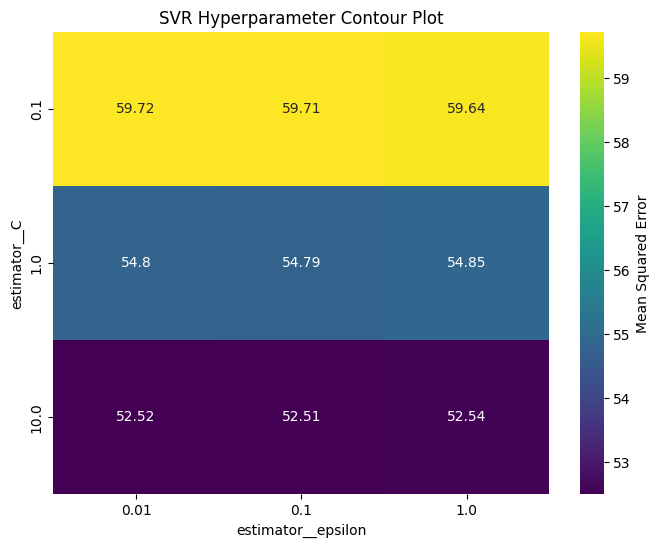

In [ ]:
plot_contour(gbr, gbr_param_grid, X_train, y_train, 'estimator__n_estimators', 'estimator__learning_rate', 'GBR')
plot_contour(rf, rf_param_grid, X_train, y_train, 'estimator__n_estimators', 'estimator__max_depth', 'RF')
plot_contour(svr, svr_param_grid, X_train, y_train, 'estimator__C', 'estimator__epsilon', 'SVR')


In [46]:
from sklearn.feature_selection import RFECV


In [47]:
def select_features(model, X_train, y_train):
    selector = RFECV(model, step=1, cv=5, scoring='r2', n_jobs=-1)
    selector.fit(X_train, y_train)
    return selector


In [48]:

def select_features(model, X_train, y_train, target_col):
    selector = RFECV(model, step=1, cv=5, scoring='r2', n_jobs=-1)
    selector.fit(X_train, y_train[target_col])
    return selector


In [49]:
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
svr = SVR()


In [50]:

param_grids = {
    'GBR': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'RF': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVR': {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [1, 10, 100],
        'epsilon': [0.01, 0.1, 1]
    }
}


In [51]:
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
svr = SVR()


In [52]:
from sklearn.linear_model import LinearRegression

def select_features(model, X_train, y_train, target_col):
    if isinstance(model, SVR):
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        model = RFE (lr)
    else:
        model = RFECV(model, step=1, cv=5, scoring='r2', n_jobs=-1)

    model.fit(X_train, y_train[target_col])
    return model




In [53]:
from sklearn.feature_selection import RFE


In [54]:
models = {'GBR': gbr, 'RF': rf, 'SVR': svr}

for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])
        
        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        print("\n")



Output Cel (%):
Performing feature selection for GBR...
Selected features: ['N (%)', 'VM (%)', 'Ash (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.931
RMSE (train): 0.000
RMSE (test): 2.150
MAE (train): 0.000
MAE (test): 0.824


Performing feature selection for RF...
Selected features: ['VM (%)', 'Ash (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.995
R2 score (test): 0.939
RMSE (train): 0.700
RMSE (test): 2.015
MAE (train): 0.177
MAE (test): 0.949


Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'O (%)', 'S (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.161
R2 score (tes

In [55]:
def select_features(model, X_train, y_train, target_col):
    n_features_to_select = 4
    
    if isinstance(model, SVR):
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        model = RFE(lr, n_features_to_select=n_features_to_select)
    else:
        model = RFECV(model, step=1, cv=5, scoring='r2', n_jobs=-1, min_features_to_select=n_features_to_select)

    model.fit(X_train, y_train[target_col])
    return model


In [56]:
models = {'GBR': gbr, 'RF': rf, 'SVR': svr}

for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])
        
        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        print("\n")


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.884
RMSE (train): 0.002
RMSE (test): 2.794
MAE (train): 0.001
MAE (test): 1.030


Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.994
R2 score (test): 0.943
RMSE (train): 0.731
RMSE (test): 1.954
MAE (train): 0.171
MAE (test): 0.879


Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'O (%)', 'S (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR mo

In [57]:
import matplotlib.pyplot as plt


In [58]:
def plot_parity(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Line of best fit
    m, b = np.polyfit(y_true, y_pred, 1)
    plt.plot(y_true, m * y_true + b, color='red')

    # Diagonal line
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')

    plt.show()


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.884
RMSE (train): 0.002
RMSE (test): 2.794
MAE (train): 0.001
MAE (test): 1.030


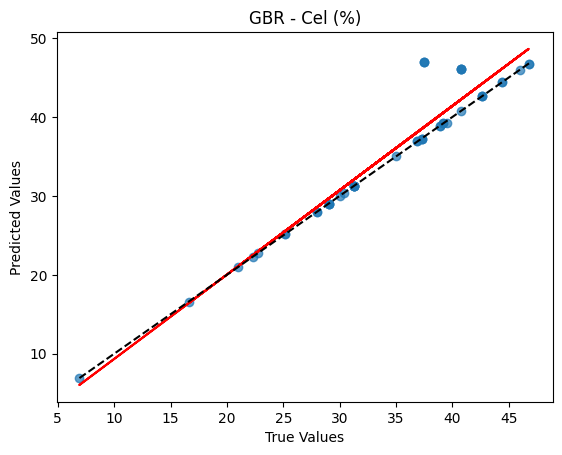



Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.994
R2 score (test): 0.943
RMSE (train): 0.731
RMSE (test): 1.954
MAE (train): 0.171
MAE (test): 0.879


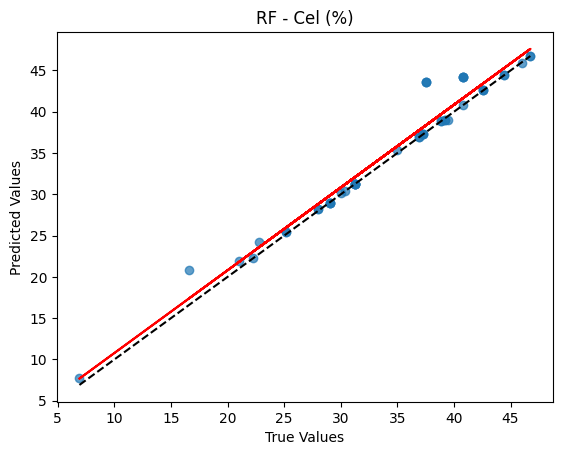



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'O (%)', 'S (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.161
R2 score (test): 0.204
RMSE (train): 8.725
RMSE (test): 7.307
MAE (train): 6.310
MAE (test): 4.827


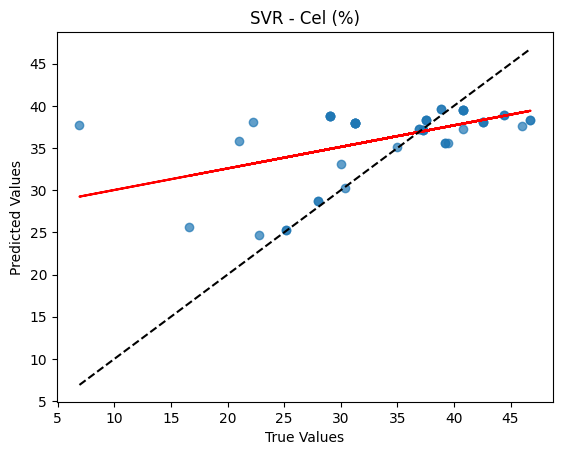



Output Hem (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.946
RMSE (train): 0.000
RMSE (test): 2.361
MAE (train): 0.000
MAE (test): 0.873


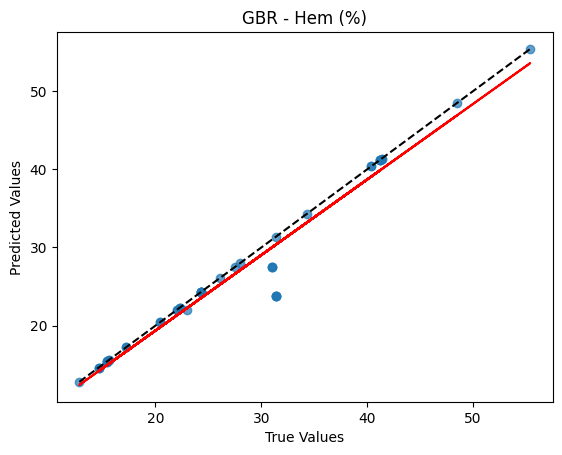



Performing feature selection for RF...
Selected features: ['C (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.981
R2 score (test): 0.876
RMSE (train): 1.345
RMSE (test): 3.576
MAE (train): 0.280
MAE (test): 1.587


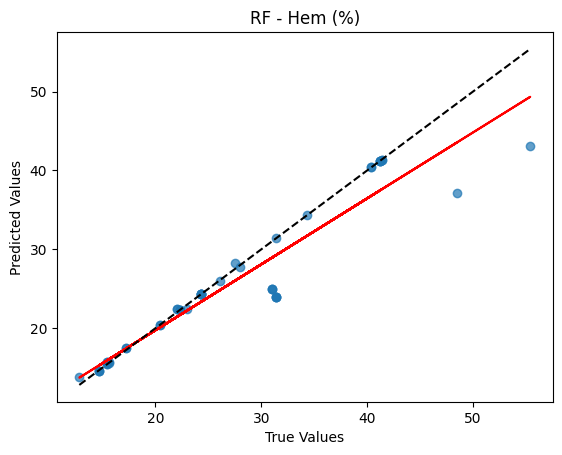



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.242
R2 score (test): 0.027
RMSE (train): 8.420
RMSE (test): 10.032
MAE (train): 6.361
MAE (test): 6.758


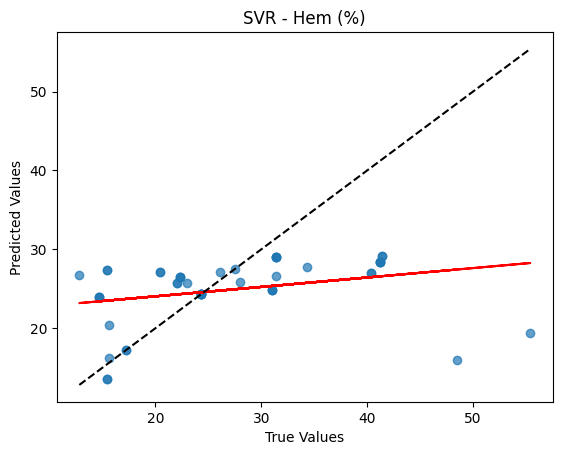



Output Lig (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.978
RMSE (train): 0.000
RMSE (test): 1.614
MAE (train): 0.000
MAE (test): 0.613


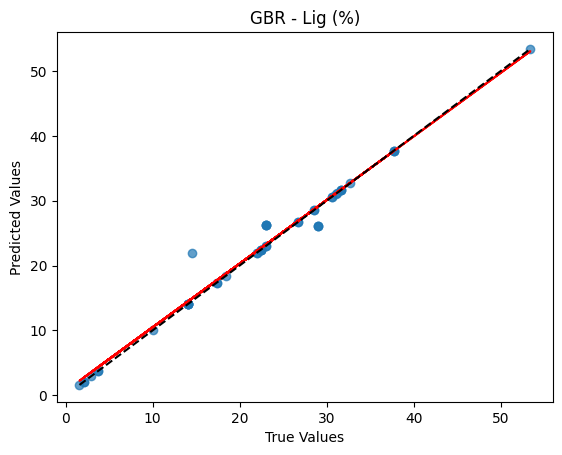



Performing feature selection for RF...
Selected features: ['H (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.994
R2 score (test): 0.954
RMSE (train): 0.809
RMSE (test): 2.318
MAE (train): 0.204
MAE (test): 1.068


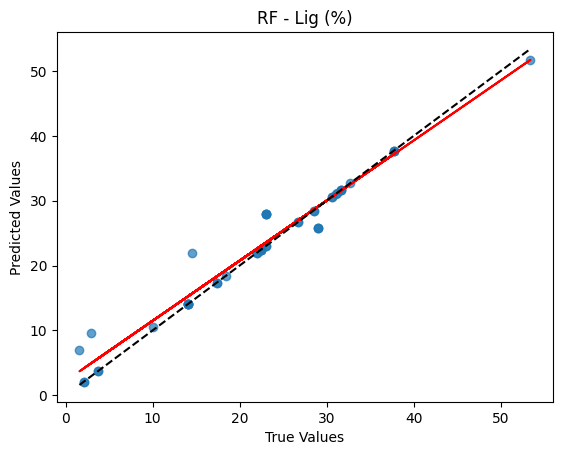



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.166
R2 score (test): 0.032
RMSE (train): 9.816
RMSE (test): 10.618
MAE (train): 6.653
MAE (test): 7.403


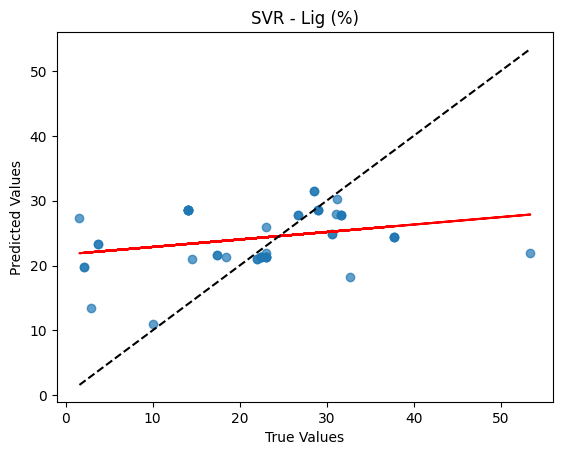

In [59]:
for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])

        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        
        y_pred_test = tuned_model.predict(X_test_selected)
        plot_parity(y_test[output_col], y_pred_test, title=f"{name} - {output_col}")
        
        print("\n")


In [60]:
def plot_parity(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Diagonal line
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')

    plt.show()


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.884
RMSE (train): 0.002
RMSE (test): 2.794
MAE (train): 0.001
MAE (test): 1.030


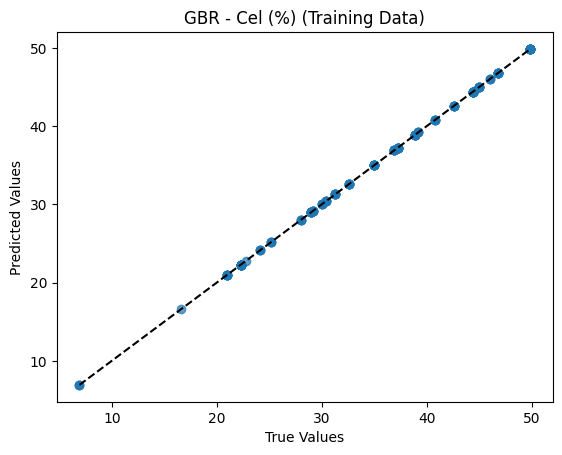



Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.994
R2 score (test): 0.943
RMSE (train): 0.731
RMSE (test): 1.954
MAE (train): 0.171
MAE (test): 0.879


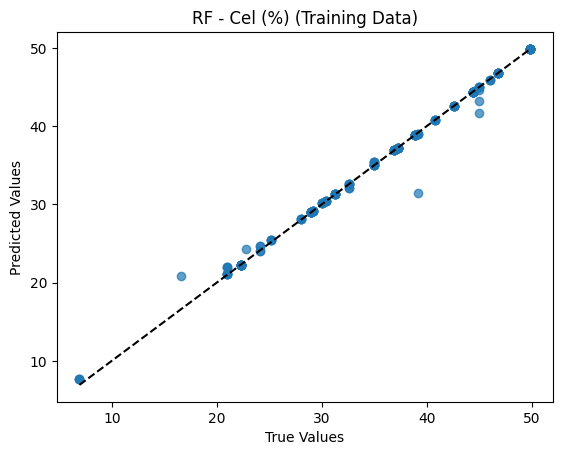



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'O (%)', 'S (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.161
R2 score (test): 0.204
RMSE (train): 8.725
RMSE (test): 7.307
MAE (train): 6.310
MAE (test): 4.827


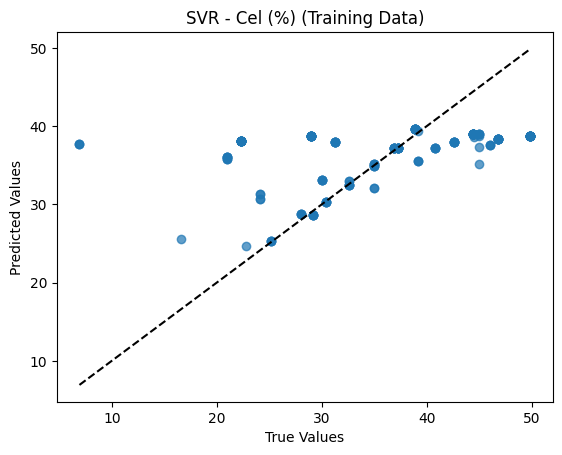



Output Hem (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.946
RMSE (train): 0.000
RMSE (test): 2.361
MAE (train): 0.000
MAE (test): 0.873


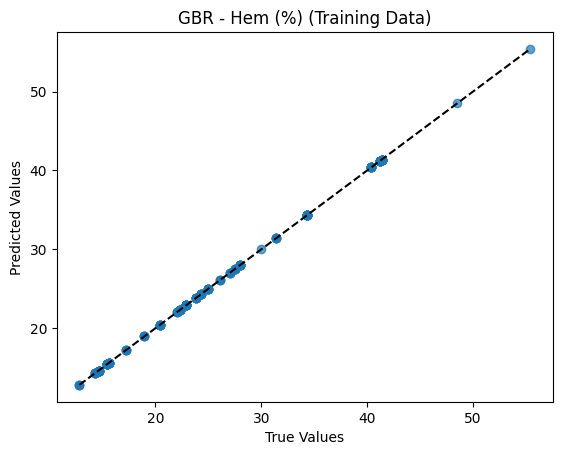



Performing feature selection for RF...
Selected features: ['C (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.981
R2 score (test): 0.876
RMSE (train): 1.345
RMSE (test): 3.576
MAE (train): 0.280
MAE (test): 1.587


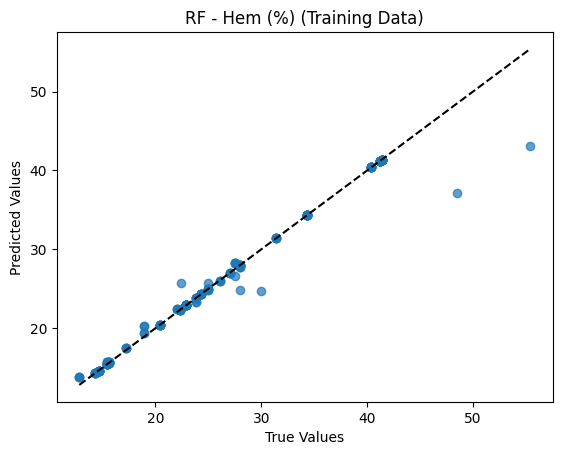



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.242
R2 score (test): 0.027
RMSE (train): 8.420
RMSE (test): 10.032
MAE (train): 6.361
MAE (test): 6.758


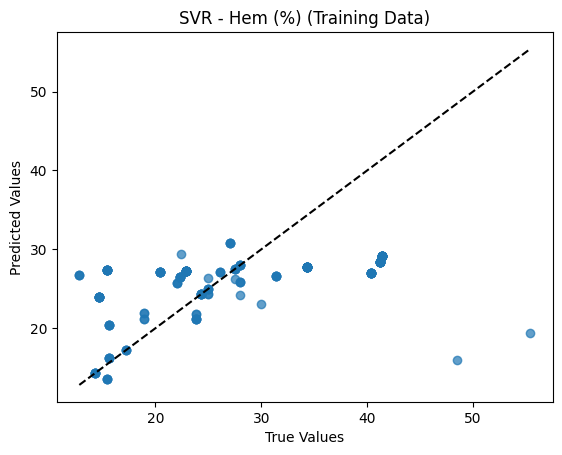



Output Lig (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.978
RMSE (train): 0.000
RMSE (test): 1.614
MAE (train): 0.000
MAE (test): 0.613


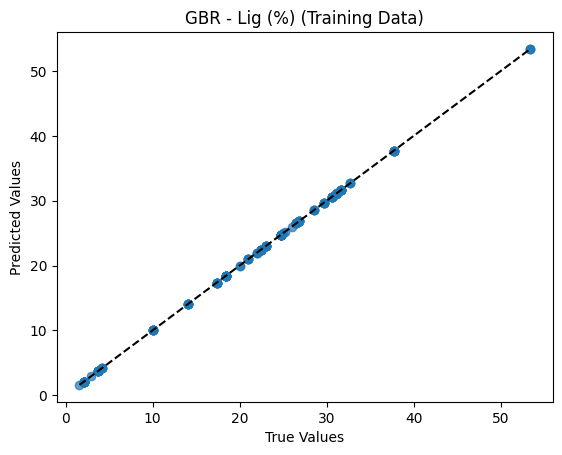



Performing feature selection for RF...
Selected features: ['H (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.994
R2 score (test): 0.954
RMSE (train): 0.809
RMSE (test): 2.318
MAE (train): 0.204
MAE (test): 1.068


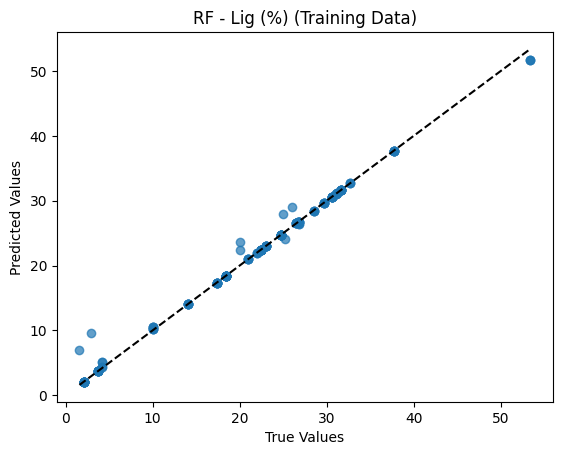



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.166
R2 score (test): 0.032
RMSE (train): 9.816
RMSE (test): 10.618
MAE (train): 6.653
MAE (test): 7.403


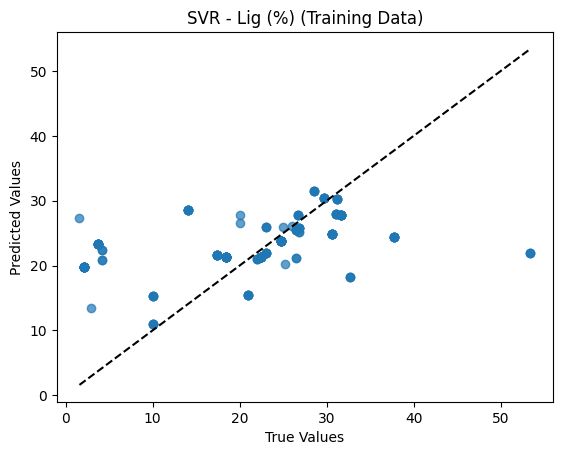

In [61]:
for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])

        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        
        y_pred_train = tuned_model.predict(X_train_selected)
        plot_parity(y_train[output_col], y_pred_train, title=f"{name} - {output_col} (Training Data)")
        
        print("\n")


In [40]:
import seaborn as sns


In [41]:
def plot_parity(y_true, y_pred, title=''):
    sns.set(style='whitegrid', font_scale=1.2)

    # Scatter plot with a color map
    cmap = sns.cubehelix_palette(as_cmap=True)
    points = plt.scatter(y_true, y_pred, c=y_pred, cmap=cmap, alpha=0.7)
    plt.colorbar(points, label='Predicted Values')

    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Diagonal line
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2)

    plt.show()


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.884
RMSE (train): 0.002
RMSE (test): 2.794
MAE (train): 0.001
MAE (test): 1.030


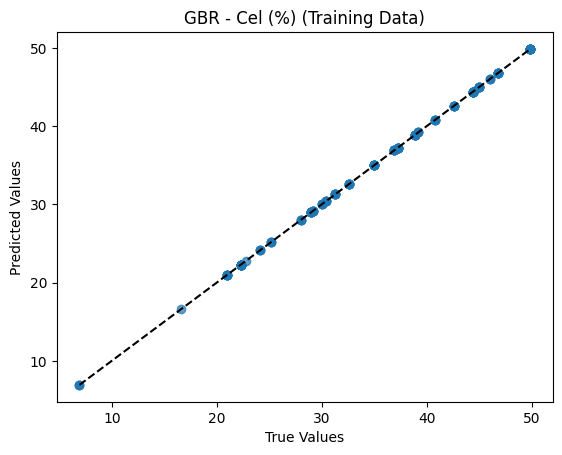



Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.994
R2 score (test): 0.943
RMSE (train): 0.731
RMSE (test): 1.954
MAE (train): 0.171
MAE (test): 0.879


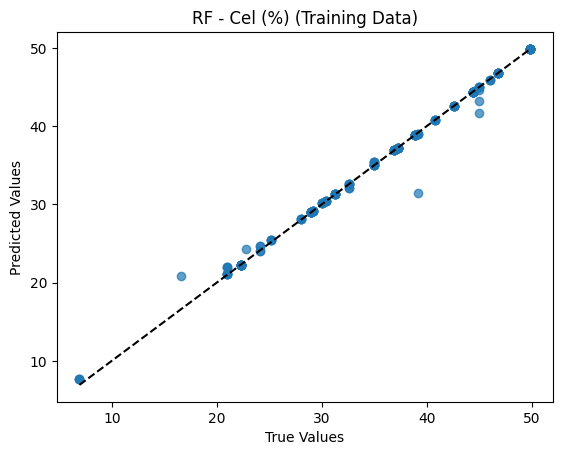



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'O (%)', 'S (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.161
R2 score (test): 0.204
RMSE (train): 8.725
RMSE (test): 7.307
MAE (train): 6.310
MAE (test): 4.827


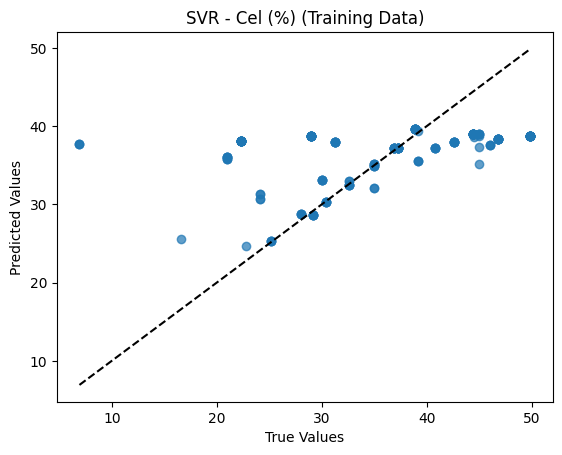



Output Hem (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.946
RMSE (train): 0.000
RMSE (test): 2.361
MAE (train): 0.000
MAE (test): 0.873


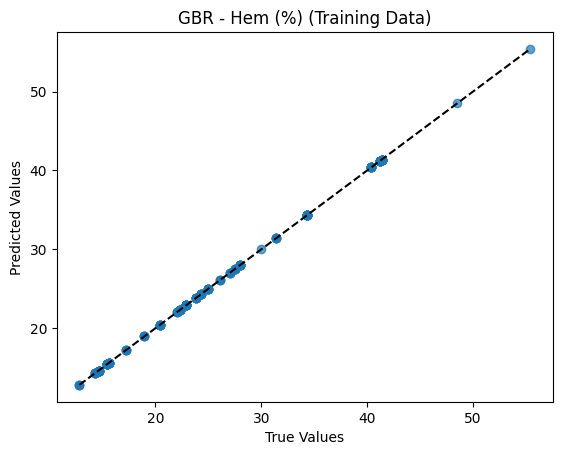



Performing feature selection for RF...
Selected features: ['C (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.981
R2 score (test): 0.876
RMSE (train): 1.345
RMSE (test): 3.576
MAE (train): 0.280
MAE (test): 1.587


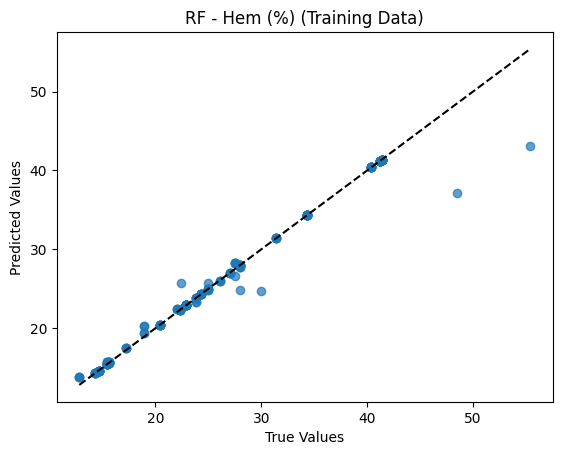



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.242
R2 score (test): 0.027
RMSE (train): 8.420
RMSE (test): 10.032
MAE (train): 6.361
MAE (test): 6.758


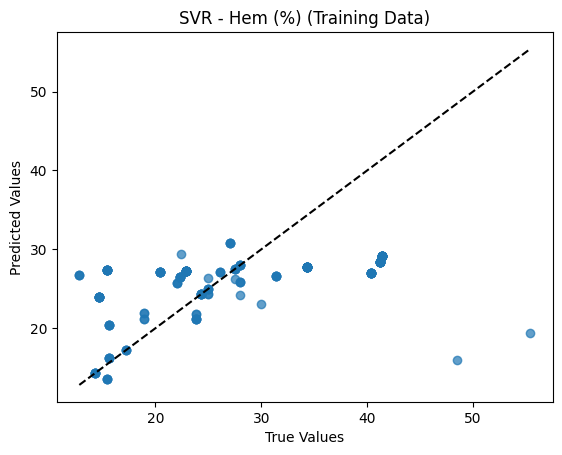



Output Lig (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.978
RMSE (train): 0.000
RMSE (test): 1.614
MAE (train): 0.000
MAE (test): 0.613


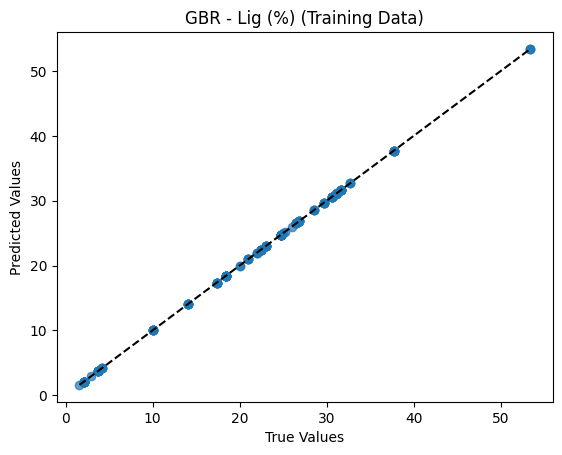



Performing feature selection for RF...
Selected features: ['H (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.994
R2 score (test): 0.954
RMSE (train): 0.809
RMSE (test): 2.318
MAE (train): 0.204
MAE (test): 1.068


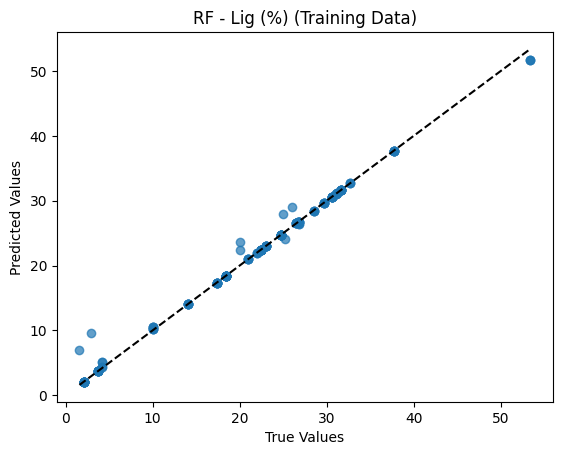



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.166
R2 score (test): 0.032
RMSE (train): 9.816
RMSE (test): 10.618
MAE (train): 6.653
MAE (test): 7.403


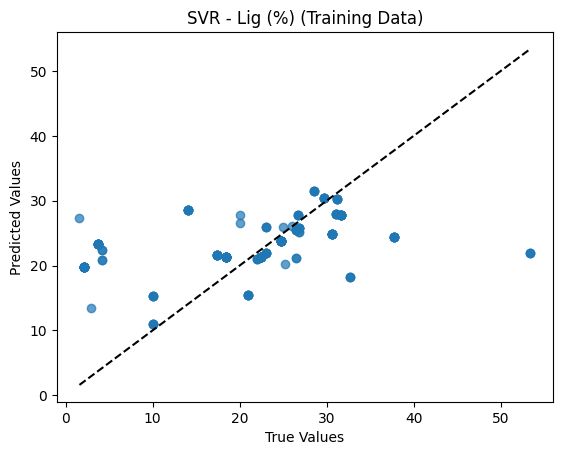

In [62]:
for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])

        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        
        y_pred_train = tuned_model.predict(X_train_selected)
        plot_parity(y_train[output_col], y_pred_train, title=f"{name} - {output_col} (Training Data)")
        
        print("\n")


In [63]:
def plot_parity(y_true_train, y_pred_train, y_true_test, y_pred_test, title=''):
    sns.set(style='whitegrid', font_scale=1.2)

    # Scatter plot with a color map for training data
    cmap_train = sns.cubehelix_palette(start=0.5, rot=-0.5, as_cmap=True)
    points_train = plt.scatter(y_true_train, y_pred_train, c=y_pred_train, cmap=cmap_train, alpha=0.7, marker='o', label='Training Data')

    # Scatter plot with a color map for test data
    cmap_test = sns.cubehelix_palette(start=2.5, rot=-0.5, as_cmap=True)
    points_test = plt.scatter(y_true_test, y_pred_test, c=y_pred_test, cmap=cmap_test, alpha=0.7, marker='s', label='Test Data')

    plt.colorbar(points_train, label='Predicted Values')

    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Diagonal line
    min_val = min(min(y_true_train), min(y_true_test), min(y_pred_train), min(y_pred_test))
    max_val = max(max(y_true_train), max(y_true_test), max(y_pred_train), max(y_pred_test))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2)

    plt.legend()
    plt.show()


Output Cel (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.884
RMSE (train): 0.002
RMSE (test): 2.794
MAE (train): 0.001
MAE (test): 1.030


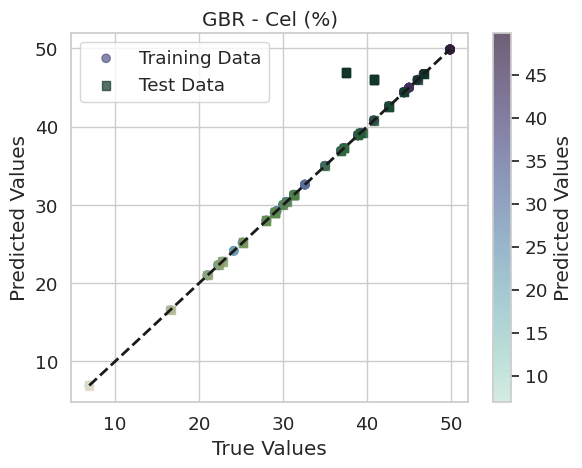



Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.994
R2 score (test): 0.943
RMSE (train): 0.731
RMSE (test): 1.954
MAE (train): 0.171
MAE (test): 0.879


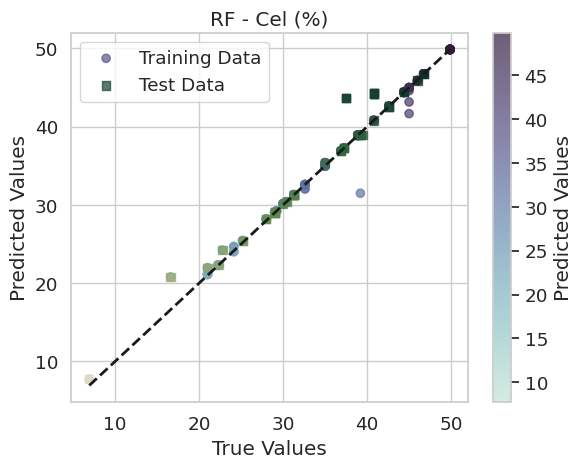



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'O (%)', 'S (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.161
R2 score (test): 0.204
RMSE (train): 8.725
RMSE (test): 7.307
MAE (train): 6.310
MAE (test): 4.827


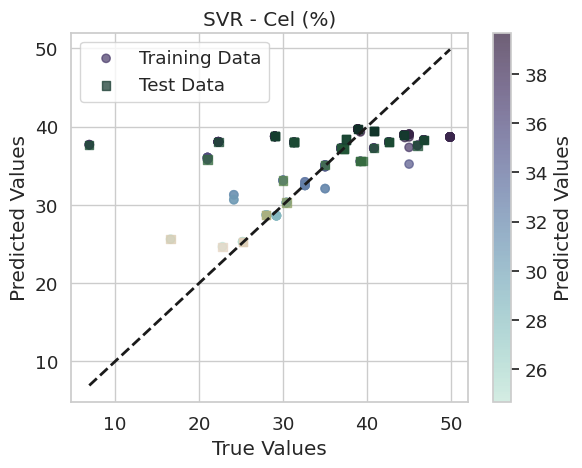



Output Hem (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.946
RMSE (train): 0.000
RMSE (test): 2.361
MAE (train): 0.000
MAE (test): 0.873


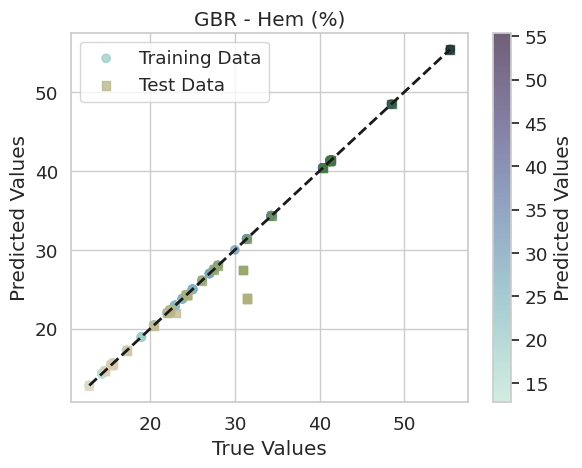



Performing feature selection for RF...
Selected features: ['C (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.981
R2 score (test): 0.876
RMSE (train): 1.345
RMSE (test): 3.576
MAE (train): 0.280
MAE (test): 1.587


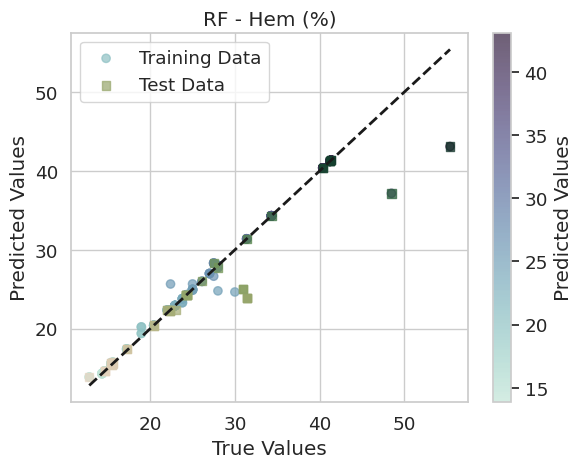



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.242
R2 score (test): 0.027
RMSE (train): 8.420
RMSE (test): 10.032
MAE (train): 6.361
MAE (test): 6.758


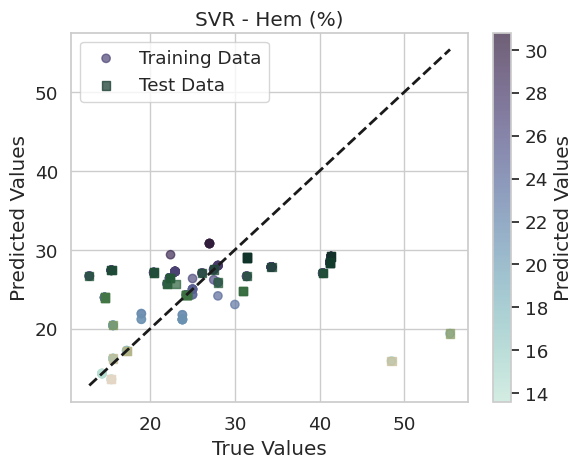



Output Lig (%):
Performing feature selection for GBR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning GBR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR model evaluation (tuned and feature selection):
R2 score (train): 1.000
R2 score (test): 0.978
RMSE (train): 0.000
RMSE (test): 1.614
MAE (train): 0.000
MAE (test): 0.613


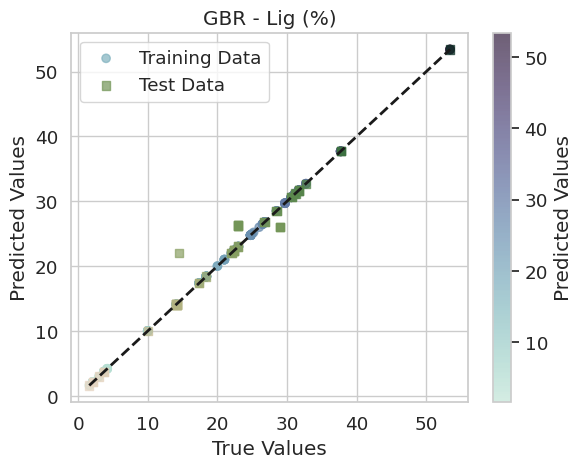



Performing feature selection for RF...
Selected features: ['H (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RF model evaluation (tuned and feature selection):
R2 score (train): 0.994
R2 score (test): 0.954
RMSE (train): 0.809
RMSE (test): 2.318
MAE (train): 0.204
MAE (test): 1.068


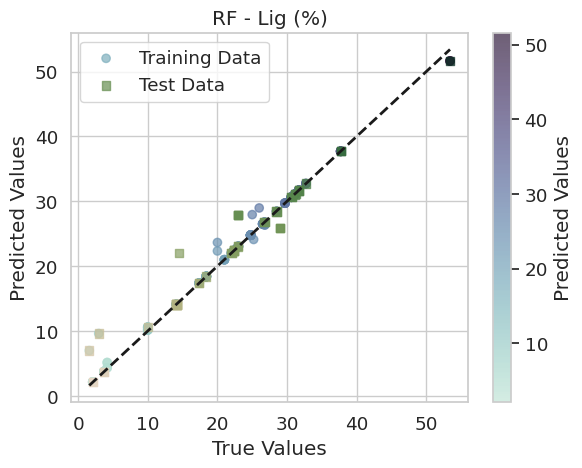



Performing feature selection for SVR...
Selected features: ['C (%)', 'H (%)', 'N (%)', 'O (%)']
Tuning SVR hyperparameters...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR model evaluation (tuned and feature selection):
R2 score (train): 0.166
R2 score (test): 0.032
RMSE (train): 9.816
RMSE (test): 10.618
MAE (train): 6.653
MAE (test): 7.403


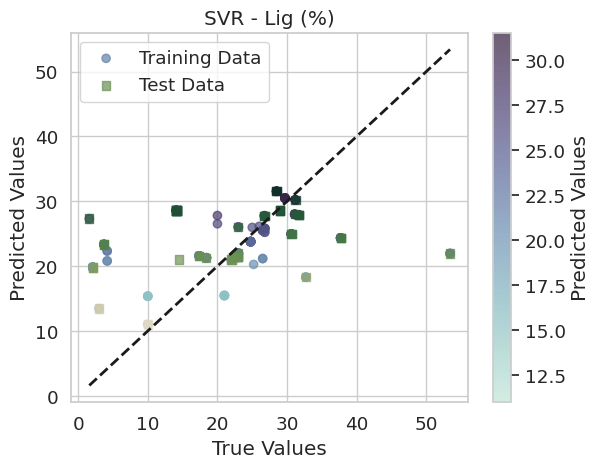

In [64]:
for output_col in y_train.columns:
    print(f"Output {output_col}:")
    for name, model in models.items():
        print(f"Performing feature selection for {name}...")
        selector = select_features(model, X_train, y_train, output_col)
        X_train_selected = X_train.iloc[:, selector.support_]
        X_test_selected = X_test.iloc[:, selector.support_]
        print(f"Selected features: {X_train_selected.columns.tolist()}")

        print(f"Tuning {name} hyperparameters...")
        tuned_model = tune_hyperparameters(model, param_grids[name], X_train_selected, y_train[output_col])

        r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test = evaluate_model(tuned_model, X_train_selected, y_train[output_col], X_test_selected, y_test[output_col])
        print(f"{name} model evaluation (tuned and feature selection):")
        print(f"R2 score (train): {r2_train:.3f}")
        print(f"R2 score (test): {r2_test:.3f}")
        print(f"RMSE (train): {rmse_train:.3f}")
        print(f"RMSE (test): {rmse_test:.3f}")
        print(f"MAE (train): {mae_train:.3f}")
        print(f"MAE (test): {mae_test:.3f}")
        
        y_pred_train = tuned_model.predict(X_train_selected)
        y_pred_test = tuned_model.predict(X_test_selected)
        plot_parity(y_train[output_col], y_pred_train, y_test[output_col], y_pred_test, title=f"{name} - {output_col}")
        
        print("\n")


In [65]:
!pip install shap
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 15.3 MB/s eta 0:00:00


Output Cel (%):
Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


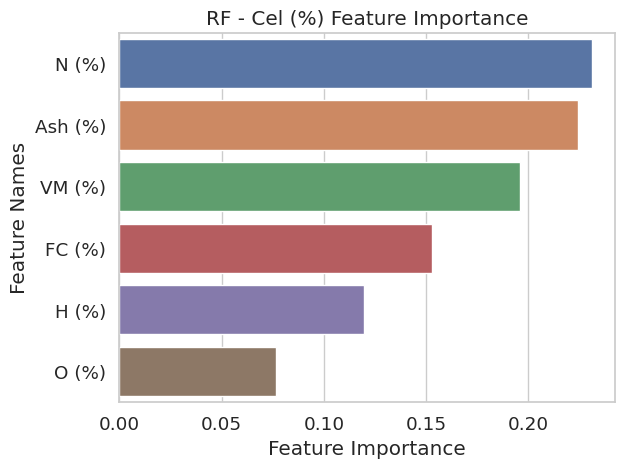

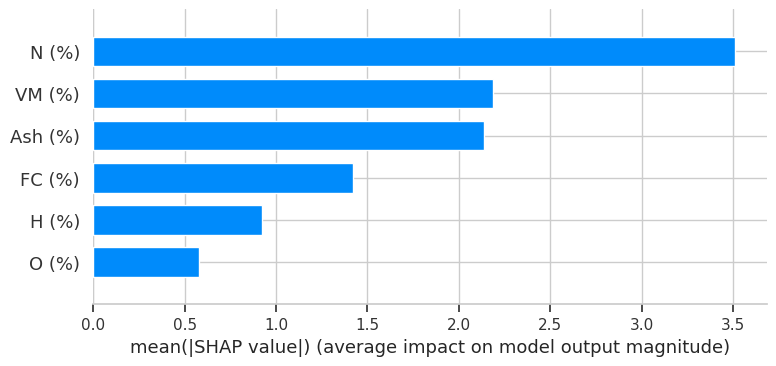



Output Hem (%):
Performing feature selection for RF...
Selected features: ['C (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


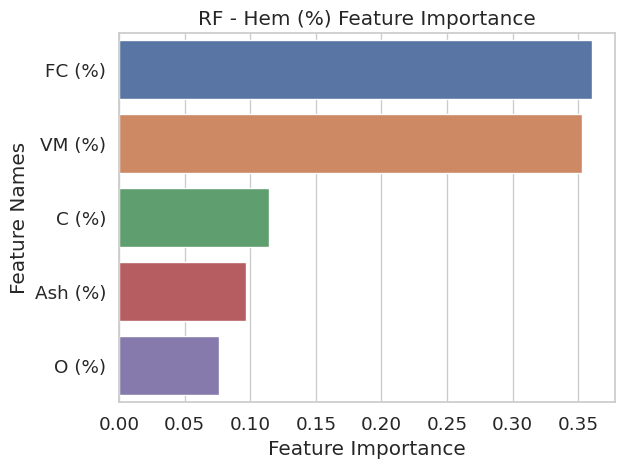

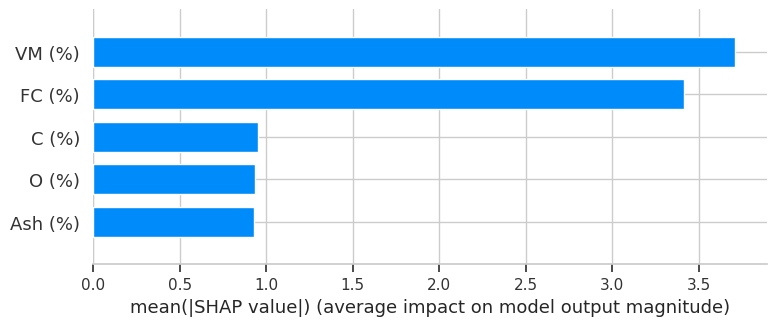



Output Lig (%):
Performing feature selection for RF...
Selected features: ['H (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


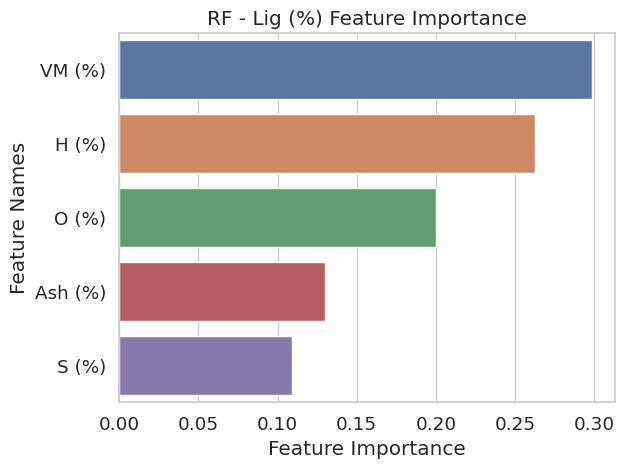

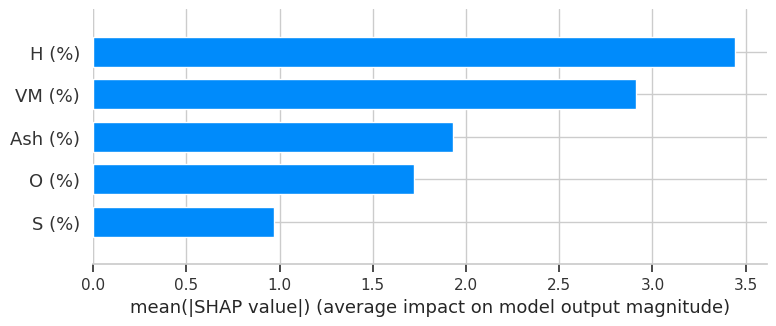

In [66]:
def plot_feature_importance(importance, names, title):
    sns.set(style='whitegrid', font_scale=1.2)
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    plt.show()

selected_model_name = 'RF'
selected_model = models[selected_model_name]

for output_col in y_train.columns:
    print(f"Output {output_col}:")
    
    print(f"Performing feature selection for {selected_model_name}...")
    selector = select_features(selected_model, X_train, y_train, output_col)
    X_train_selected = X_train.iloc[:, selector.support_]
    X_test_selected = X_test.iloc[:, selector.support_]
    print(f"Selected features: {X_train_selected.columns.tolist()}")

    print(f"Tuning {selected_model_name} hyperparameters...")
    tuned_model = tune_hyperparameters(selected_model, param_grids[selected_model_name], X_train_selected, y_train[output_col])

    # Feature importance plot
    feature_importances = tuned_model.feature_importances_
    plot_feature_importance(feature_importances, X_train_selected.columns, title=f"{selected_model_name} - {output_col} Feature Importance")

    # SHAP analysis plot
    explainer = shap.TreeExplainer(tuned_model)
    shap_values = explainer.shap_values(X_train_selected)

    shap.summary_plot(shap_values, X_train_selected, plot_type='bar', title=f"{selected_model_name} - {output_col} SHAP Analysis")
    print("\n")


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


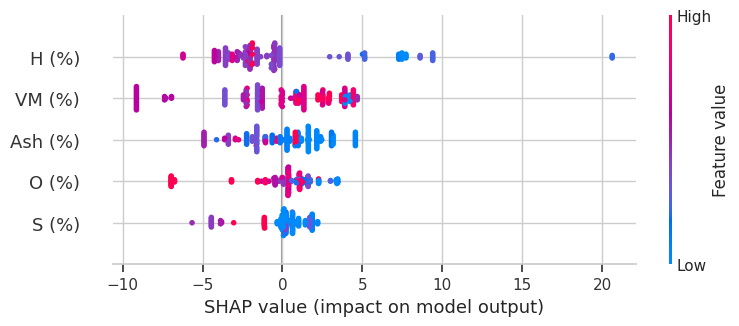

In [67]:
# SHAP analysis plot
explainer = shap.TreeExplainer(tuned_model)
shap_values = explainer.shap_values(X_train_selected)

shap.summary_plot(shap_values, X_train_selected, plot_type='dot', title=f"{selected_model_name} - {output_col} SHAP Analysis")


In [68]:
def select_features_multi_output(model, X, y, num_features=4):
    # Train an RFE model
    rfe = RFE(estimator=model, n_features_to_select=num_features)
    rfe = rfe.fit(X, y)
    
    return rfe




Performing feature selection for RF...
Selected features: ['H (%)', 'N (%)', 'O (%)', 'VM (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


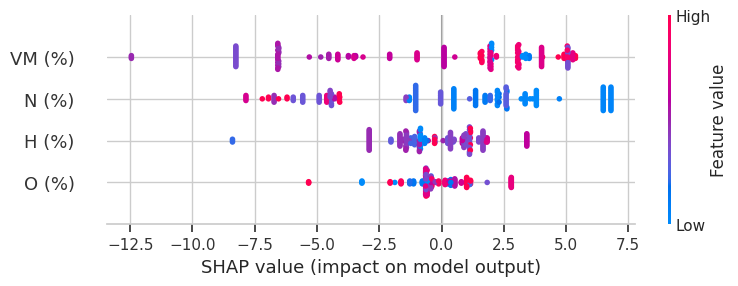

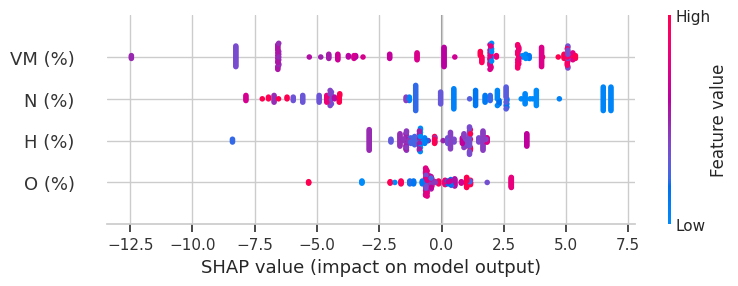

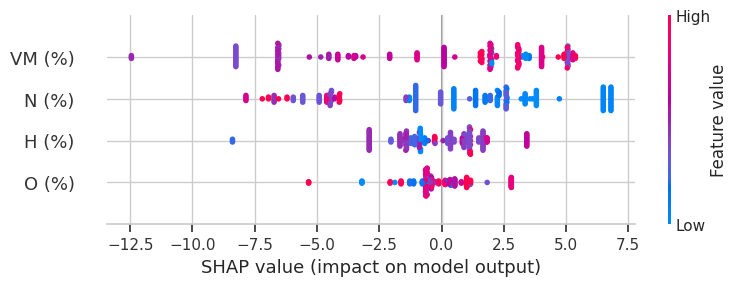

In [69]:
selected_model_name = 'RF'
selected_model = models[selected_model_name]

# Perform feature selection for the selected model
print(f"Performing feature selection for {selected_model_name}...")
selector = select_features_multi_output(selected_model, X_train, y_train)
X_train_selected = X_train.iloc[:, selector.support_]
X_test_selected = X_test.iloc[:, selector.support_]
print(f"Selected features: {X_train_selected.columns.tolist()}")

# Tune hyperparameters for multi-output model
print(f"Tuning {selected_model_name} hyperparameters...")
multi_output_model = MultiOutputRegressor(tune_hyperparameters(selected_model, param_grids[selected_model_name], X_train_selected, y_train))

# Train the multi-output model
multi_output_model.fit(X_train_selected, y_train)

# Create SHAP tornado plots for each output variable
explainer = shap.TreeExplainer(multi_output_model.estimators_[0])
shap_values = [explainer.shap_values(X_train_selected) for _ in y_train.columns]

for idx, output_col in enumerate(y_train.columns):
    shap.summary_plot(shap_values[idx], X_train_selected, plot_type='dot', title=f"{selected_model_name} - {output_col} SHAP Analysis")


Using all features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


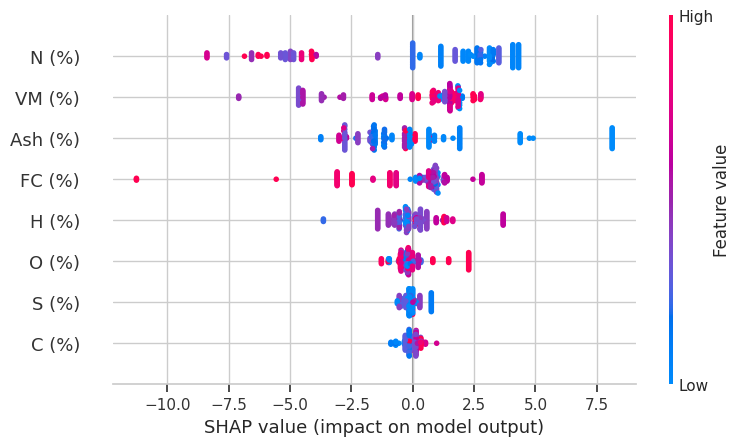

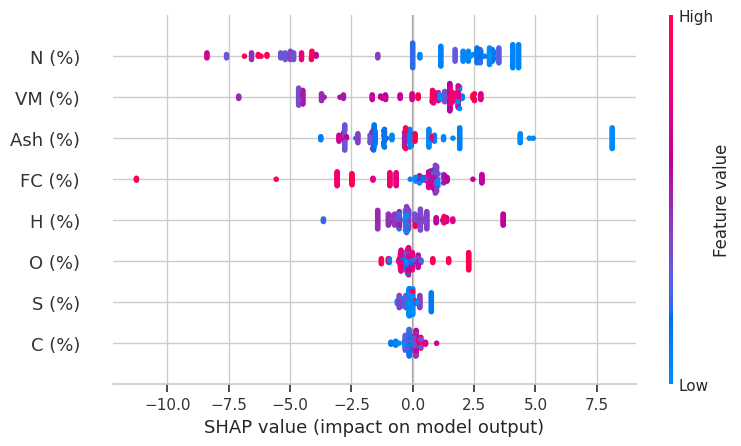

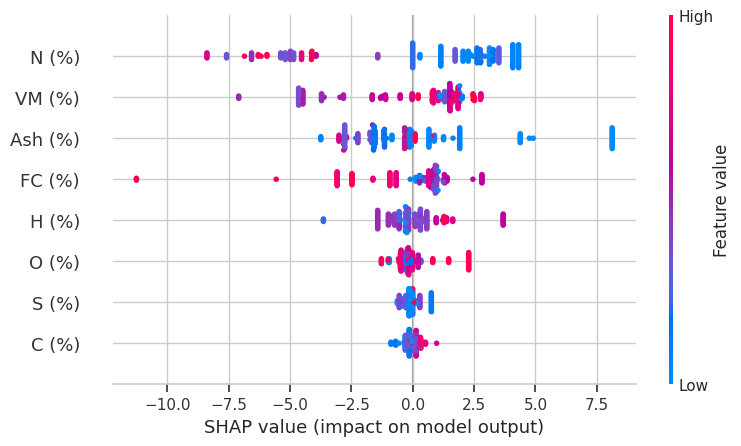

In [70]:
selected_model_name = 'RF'
selected_model = models[selected_model_name]

# Use all features
X_train_selected = X_train
X_test_selected = X_test
print(f"Using all features: {X_train_selected.columns.tolist()}")

# Tune hyperparameters for multi-output model
print(f"Tuning {selected_model_name} hyperparameters...")
multi_output_model = MultiOutputRegressor(tune_hyperparameters(selected_model, param_grids[selected_model_name], X_train_selected, y_train))

# Train the multi-output model
multi_output_model.fit(X_train_selected, y_train)

# Create SHAP tornado plots for each output variable
explainer = shap.TreeExplainer(multi_output_model.estimators_[0])
shap_values = [explainer.shap_values(X_train_selected) for _ in y_train.columns]

for idx, output_col in enumerate(y_train.columns):
    shap.summary_plot(shap_values[idx], X_train_selected, plot_type='dot', title=f"{selected_model_name} - {output_col} SHAP Analysis")


Using all features: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)']
Tuning RF hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


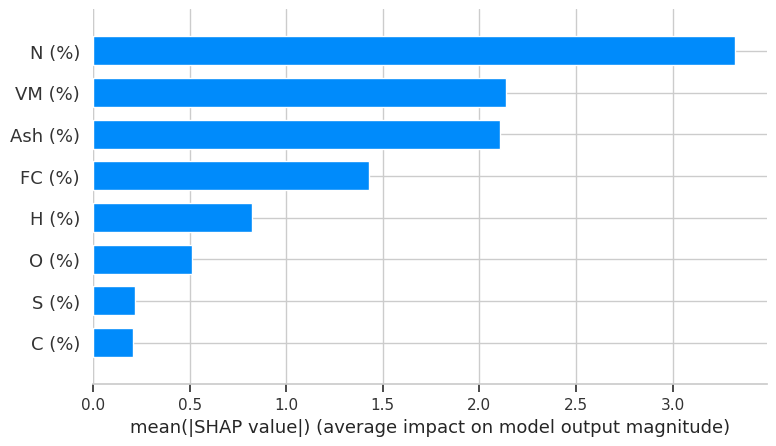

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


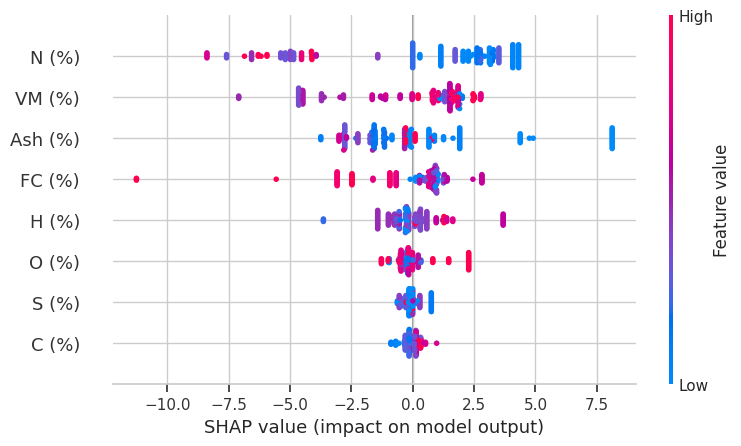

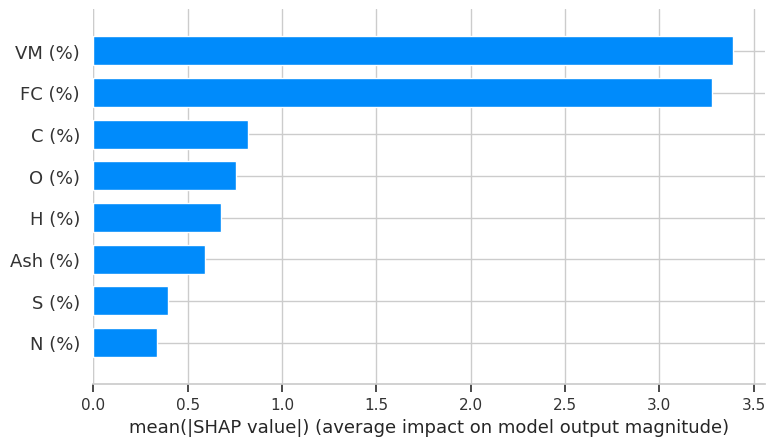

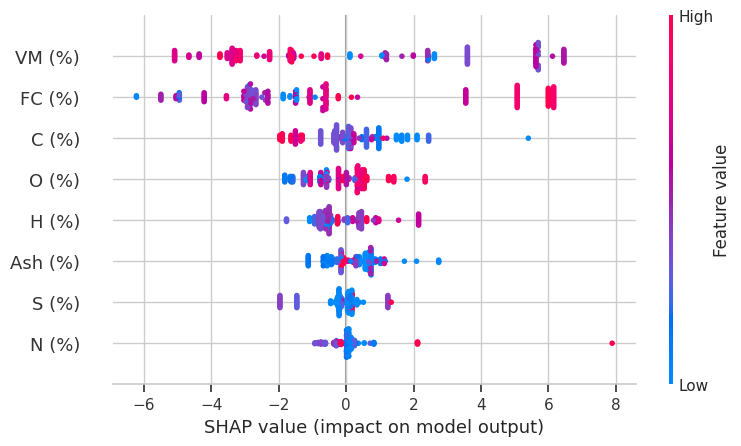

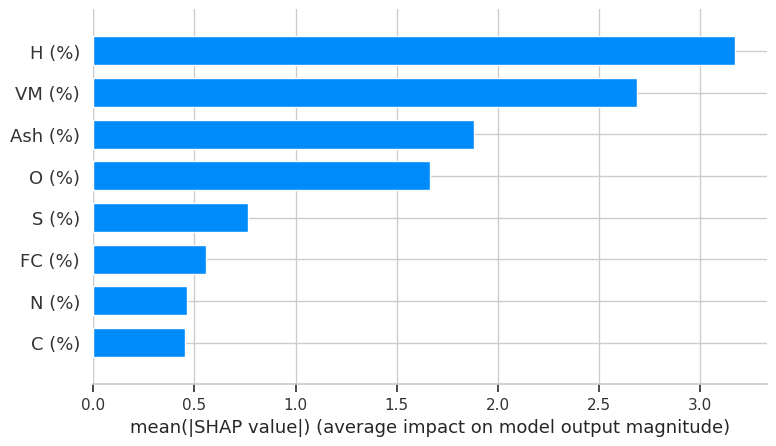

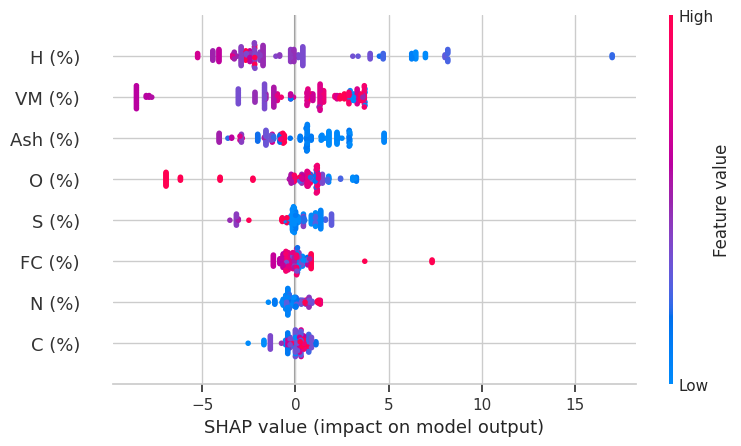

In [71]:
selected_model_name = 'RF'
selected_model = models[selected_model_name]

# Use all features
X_train_selected = X_train
X_test_selected = X_test
print(f"Using all features: {X_train_selected.columns.tolist()}")

# Tune hyperparameters for multi-output model
print(f"Tuning {selected_model_name} hyperparameters...")
multi_output_model = MultiOutputRegressor(tune_hyperparameters(selected_model, param_grids[selected_model_name], X_train_selected, y_train))

# Train the multi-output model
multi_output_model.fit(X_train_selected, y_train)

# Create SHAP bar and tornado plots for each output variable
for idx, output_col in enumerate(y_train.columns):
    explainer = shap.TreeExplainer(multi_output_model.estimators_[idx])
    shap_values = explainer.shap_values(X_train_selected)
    
    # SHAP bar plot
    shap.summary_plot(shap_values, X_train_selected, plot_type='bar', title=f"{selected_model_name} - {output_col} SHAP Analysis (Bar)")
    
    # SHAP tornado plot
    shap.summary_plot(shap_values, X_train_selected, plot_type='dot', title=f"{selected_model_name} - {output_col} SHAP Analysis (Tornado)")


In [72]:
import ipywidgets as widgets
from IPython.display import display

# Function to predict using the multi_output_model and display the results
def predict(inputs):
    input_data = pd.DataFrame([inputs], columns=X_train.columns)
    predictions = multi_output_model.predict(input_data)
    for i, output_col in enumerate(y_train.columns):
        print(f"{output_col}: {predictions[0][i]:.2f}")

# Create input widgets for each feature
input_widgets = {}
for col in X_train.columns:
    input_widgets[col] = widgets.FloatText(value=0, description=col)

# Create a button for prediction
predict_button = widgets.Button(description="Predict")

# Function to handle button click
def on_button_click(b):
    inputs = {key: widget.value for key, widget in input_widgets.items()}
    predict(inputs)

predict_button.on_click(on_button_click)

# Display the widgets
for widget in input_widgets.values():
    display(widget)
display(predict_button)


FloatText(value=0.0, description='C (%)')

FloatText(value=0.0, description='H (%)')

FloatText(value=0.0, description='N (%)')

FloatText(value=0.0, description='O (%)')

FloatText(value=0.0, description='S (%)')

FloatText(value=0.0, description='VM (%)')

FloatText(value=0.0, description='Ash (%)')

FloatText(value=0.0, description='FC (%)')

Button(description='Predict', style=ButtonStyle())

In [ ]:
import sklearn
print("scikit-learn version:", sklearn.__version__)



scikit-learn version: 1.2.2
